# Double Pendulum Project

We want to solve the differential equation for a double pendulum using different Runge-Kutta (RK) methods. Unlike a single pendulum, the double pendulum system has four co-ordinates of interest: the angular position and velocity of each pendulum $(\theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2)$. There is a differential equation for each pendulum and each is coupled to the other, so the RK method used in lecture will have to be extended to handle two coupled functions.

In [86]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Runge-Kutta Solvers

Below is a general list of parameters needed for RK methods of order 1 (Euler's method) through 4. In our implementation of the double pendulum solution, the $x$ terms represent the time variable $t$.

|RK Order|  <img width=200/>$y_{i+1}$                   | <img width=200/> $z_{i+1}$                   |
|:------:|:---------------------------------------------|:---------------------------------------------|
|1       | $y_i + k_1$                                  | $z_i + l_1$                                  |
|2       | $y_i + k_2$                                  | $z_i + l_2$                                  |
|3       | $y_i + \frac{1}{6}(k_1 + 4k_2 + k_3)$        | $z_i + \frac{1}{6}(l_1 + 4l_2 + l_3)$        |
|4       | $y_i + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$ | $z_i + \frac{1}{6}(l_1 + 2l_2 + 2l_3 + l_4)$ |

where 

|$n$| <img width=200/> $k_n$ | <img width=200/> $l_n$ |
|:-:|:-----------------------|:-----------------------|
|1  | $hf(x_n, y_n, z_n)$    | $hg(x_n, y_n, z_n)$    |
|2  | $hf(x_n + \tfrac{h}{2}, y_n + \tfrac{k_1}{2}, z_n + \tfrac{l_1}{2})$ | $hg(x_n + \tfrac{h}{2}, y_n + \tfrac{k_1}{2}, z_n + \tfrac{l_1}{2})$ |
|3  | $hf(x_n + \tfrac{h}{2}, y_n + \tfrac{k_2}{2}, z_n + \tfrac{l_2}{2})$ | $hg(x_n + \tfrac{h}{2}, y_n + \tfrac{k_2}{2}, z_n + \tfrac{l_2}{2})$ |
|4  | $hf(x_n + h, y_n + k_3, z_n + l_3)$ | $hg(x_n + h, y_n + k_3, z_n + l_3)$ |

The cell below defines functions implementing the above RK methods.

In [87]:
def RK1(funcs, y_0, z_0, t, args={}):
    """
    1st-Order Runge-Kutta approximation (AKA Euler's method) to a first-order ODE system
    with initial conditions.

    Args:
        funcs: (callables)  List of the first-order ODE system to be approximated.
        y_0:   (array)      The initial condition of the y-variables.
        z_0:   (array)      The initial condition of the z-variables.
        t:     (array)      A sequence of time points for which to solve for y,z.
        args:  (dict)       Extra arguments to pass to function.

    Out:
        y:    (array)    The approximated solution of the y-system at each point in t,
                         with the initial value y_0 in the first row.
        z:    (array)    The approximated solution of the z-system at each point in t,
                         with the initial value z_0 in the first row.
    """
    
    # Initialise the approximation arrays
    y = np.zeros([len(t), len(y_0)], dtype = np.float64)
    y[0] = y_0
    z = np.zeros([len(t), len(z_0)], dtype = np.float64)
    z[0] = z_0

    # Loop through the time steps, approximating this step from the prev step
    for i, t_i in enumerate(t[:-1]):

        h = t[i+1] - t_i # size of the step

        k_1 = h*funcs[0](t_i, y[i], z[i], args)
        l_1 = h*funcs[1](t_i, y[i], z[i], args)
        
        # Euler (RK1) steps
        y[i+1] = y[i] + k_1
        z[i+1] = z[i] + l_1

    return [y,z]



def RK2(funcs, y_0, z_0, t, args={}):
    """
    2nd Order Runge-Kutta method.
    """
    y = np.zeros([len(t), len(y_0)])
    y[0] = y_0
    z = np.zeros([len(t), len(z_0)])
    z[0] = z_0
    
    for i, t_i in enumerate(t[:-1]):

        h   = t[i+1] - t_i

        k_1 = h*funcs[0](t_i, y[i], z[i], args)
        l_1 = h*funcs[1](t_i, y[i], z[i], args)
        k_2 = h*funcs[0](t_i + h/2. , y[i] + k_1/2., z[i] + l_1/2., args)
        l_2 = h*funcs[1](t_i + h/2. , y[i] + k_1/2., z[i] + l_1/2., args)

        # RK2 steps
        y[i+1] = y[i] + k_2
        z[i+1] = z[i] + l_2

    return [y,z]



def RK3(funcs, y_0, z_0, t, args={}):
    """
    3rd Order Runge-Kutta method.
    """
    y = np.zeros([len(t), len(y_0)])
    y[0] = y_0
    z = np.zeros([len(t), len(z_0)])
    z[0] = z_0
    
    for i, t_i in enumerate(t[:-1]):

        h   = t[i+1] - t_i

        k_1 = h*funcs[0](t_i        , y[i]          , z[i]          , args)
        l_1 = h*funcs[1](t_i        , y[i]          , z[i]          , args)

        k_2 = h*funcs[0](t_i + h/2. , y[i] + k_1/2. , z[i] + l_1/2. , args)
        l_2 = h*funcs[1](t_i + h/2. , y[i] + k_1/2. , z[i] + l_1/2. , args)
        
        k_3 = h*funcs[0](t_i + h/2. , y[i] + k_2/2. , z[i] + l_2/2. , args)
        l_3 = h*funcs[1](t_i + h/2. , y[i] + k_2/2. , z[i] + l_2/2. , args)
        
        # RK3 steps
        y[i+1] = y[i] + 1/6.*(k_1 + 4.*k_2 + k_3)
        z[i+1] = z[i] + 1/6.*(l_1 + 4.*l_2 + l_3)

    return [y,z]



def RK4(funcs, y_0, z_0, t, args={}):
    """
    4th Order Runge-Kutta method.
    """
    y = np.zeros([len(t), len(y_0)])
    y[0] = y_0
    z = np.zeros([len(t), len(z_0)])
    z[0] = z_0
    
    for i, t_i in enumerate(t[:-1]):

        h   = t[i+1] - t_i

        k_1 = h*funcs[0](t_i        , y[i]          , z[i]          , args)
        l_1 = h*funcs[1](t_i        , y[i]          , z[i]          , args)

        k_2 = h*funcs[0](t_i + h/2. , y[i] + k_1/2. , z[i] + l_1/2. , args)
        l_2 = h*funcs[1](t_i + h/2. , y[i] + k_1/2. , z[i] + l_1/2. , args)
        
        k_3 = h*funcs[0](t_i + h/2. , y[i] + k_2/2. , z[i] + l_2/2. , args)
        l_3 = h*funcs[1](t_i + h/2. , y[i] + k_2/2. , z[i] + l_2/2. , args)

        k_4 = h*funcs[0](t_i + h    , y[i] + k_3    , z[i] + l_3    , args)
        l_4 = h*funcs[1](t_i + h    , y[i] + k_3    , z[i] + l_3    , args)
        
        # RK4 steps
        y[i+1] = y[i] + 1/6.*(k_1 + 2.*k_2 + 2.*k_3 + k_4)
        z[i+1] = z[i] + 1/6.*(l_1 + 2.*l_2 + 2.*l_3 + l_4)

    return [y,z]

## The Double Pendulum Problem

The differential equations for a double pendulum are:

\begin{equation}
    \dot{\theta}_1 = \omega_1    
\end{equation}

\begin{equation}
    \dot{\theta}_2 = \omega_2
\end{equation}

\begin{equation}
    \dot{\omega}_1 = \frac{-g(2m_1 + m_2)\sin{\theta_1} - m_2g\sin(\theta_1 - 2\theta_2) - 2\sin(\theta_1 - \theta_2)m_2[\omega_2^2L_2 + \omega_1^2L_1\cos(\theta_1 - \theta_2)]}{L_1\big[2m_1 + m_2 - m_2\cos(2\theta_1 - 2\theta_2)\big]}
\end{equation}

\begin{equation}
    \dot{\omega}_2 = \frac{2\sin(\theta_1 - \theta_2)\big[\omega_1^2L_1(m_1 + m_2) + g(m_1 + m_2)\cos{\theta_1} + \omega_2^2L_2m_2\cos(\theta_1 - \theta_2)\big]}{L_2\big[2m_1 + m_2 - m_2\cos(2\theta_1 - 2\theta_2)\big]}
\end{equation}

We can recast even more explicitly in the language of Runge-Kutta - i.e. in terms of $y$ and $z$. With the following definitions
$$
\begin{align}
    y_0 = \theta_1, \quad y_1 \equiv \dot{y}_0 = \omega_1, \quad y_2 \equiv \dot{y}_1 = \dot{\omega_1},  \\
    z_0 = \theta_2, \quad z_1 \equiv \dot{z}_0 = \omega_2, \quad z_2 \equiv \dot{z}_1 = \dot{\omega_2},
\end{align}
$$
we get the following RK system:

\begin{equation}
    y_1 = \omega_1    
\end{equation}

\begin{equation}
    z_1 = \omega_2
\end{equation}

\begin{equation}
    y_2 = \frac{-g(2m_1 + m_2)\sin(y_0) - m_2g\sin(y_0 - 2z_0) - 2\sin(y_0 - z_0)m_2[z_1^2L_2 + y_1^2L_1\cos(y_0 - z_0)]}{L_1\big[2m_1 + m_2 - m_2\cos(2y_0 - 2z_0)\big]}
\end{equation}

\begin{equation}
    z_2 = \frac{2\sin(y_0 - z_0)\big[y_1^2L_1(m_1 + m_2) + g(m_1 + m_2)\cos(y_0) + z_1^2L_2m_2\cos(y_0 - z_0)\big]}{L_2\big[2m_1 + m_2 - m_2\cos(2y_0 - 2z_0)\big]}
\end{equation}



These equations are implemented in functional form in the cell below as the `doublePendulum(t, y, z, args)` function. It inputs `t`, a list of time sampling points; `y` and `z`, the initial conditions for the $y$ and $z$ variables, respectively; and `C`, a dictionary of constants used in expressions for $y_2$ and $z_2$.

In [88]:
def innerPendulum(t, y, z, args):
    """
    A double pendulum, described as set of two first-order ODEs.
    
    Args:
        t: list of time sampling points
        y: Inner pendulum initial state vector [angle, angular velocity] 
        z: Outer pendulum initial state vector [angle, angular velocity]
        args: Dictionary of constants
                args['g'] : local acceleration due to gravity
                args['L1']: length of the inner pendulum
                args['L2']: length of the outer pendulum
                args['m1']: mass of the inner pendulum
                args['m2']: mass of the outer pendulum

    Returns:
        dydt: ODE vector for y
        dzdt: ODE vector for z
    """
    
    g  = args['g']
    L1 = args['L1']
    L2 = args['L2']
    m1 = args['m1']
    m2 = args['m2']
    
    dydt = np.zeros(2, dtype = np.float64)
    
    dydt[0] = y[1]
    dydt[1] = (-g*(m1+m2)*np.sin(y[0]) - m2*g*np.sin(y[0]-2*z[0]) - 2*np.sin(y[0]-z[0])*m2*( (z[1]**2)*L2 + (y[1]**2)*L1*np.cos(y[0]-z[0]) ))\
                / ( L1*( 2*m1 + m2 - m2*np.cos(2*(y[0]-z[0])) ) )
    
    return dydt


def outerPendulum(t, y, z, args):
    """
    A double pendulum, described as set of two first-order ODEs.
    
    Args:
        t: list of time sampling points
        y: Inner pendulum initial state vector [angle, angular velocity] 
        z: Outer pendulum initial state vector [angle, angular velocity]
        args: Dictionary of constants
                args['g'] : local acceleration due to gravity
                args['L1']: length of the inner pendulum
                args['L2']: length of the outer pendulum
                args['m1']: mass of the inner pendulum
                args['m2']: mass of the outer pendulum

    Returns:
        dydt: ODE vector for y
        dzdt: ODE vector for z
    """
    
    g  = args['g']
    L1 = args['L1']
    L2 = args['L2']
    m1 = args['m1']
    m2 = args['m2']
    
    dzdt = np.zeros(2, dtype = np.float64)

    dzdt[0] = z[1]    
    dzdt[1] = ( 2*np.sin(y[0]-z[0])*( (y[1]**2)*L1*(m1+m2) + g*(m1+m2)*np.cos(y[0]) + (z[1]**2)*L2*m2*np.cos(y[0]-z[0]) ) )\
                / ( L2*( 2*m1 + m2 - m2*np.cos(2*(y[0]-z[0])) ) )
    
    return dzdt

In [89]:
### Parameters

solve_args          = {}
solve_args['g']     = 9.80665  # [m/s^2]
solve_args['L1']    = 1.       # [m]
solve_args['L2']    = 1.       # [m]
solve_args['m1']    = 1.       # [kg]
solve_args['m2']    = 1.       # [kg]

n_samples = 200
t_max = 10.
t = np.linspace(0., t_max, int(n_samples) + 1)  # [s]: array of time steps

initial_ang_1     = np.pi/10.  # [rad]: initial theta_1
initial_ang_2     = np.pi/10.  # [rad]: initial theta_2

initial_ang_vel_1 = 0.         # [rad/s]: initial omega_1 
initial_ang_vel_2 = 0.         # [rad/s]: initial omega_2

y_0 = np.array([initial_ang_1, initial_ang_vel_1])
z_0 = np.array([initial_ang_2, initial_ang_vel_2])

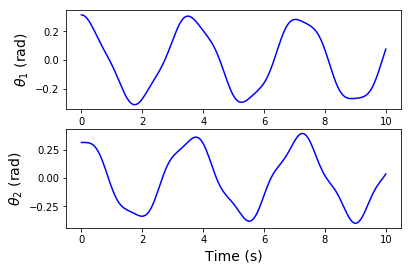

In [90]:
# Solve the double pendulum ODE using RK
doublePendulum = (innerPendulum, outerPendulum)
y, z = RK4(doublePendulum, y_0, z_0, t, solve_args)

fig = plt.figure()

# Plot Angle 1
ax_1 = fig.add_subplot(211)
ax_1.plot(t, y[:,0], c='b')
ax_1.set_xlabel('Time (s)', fontsize = 14)
ax_1.set_ylabel('$\\theta_1$ (rad)', fontsize = 14)

# Plot Angle 2
ax_2 = fig.add_subplot(212)
ax_2.plot(t, z[:,0], c='b')
ax_2.set_xlabel('Time (s)', fontsize = 14)
ax_2.set_ylabel('$\\theta_2$ (rad)', fontsize = 14)

plt.show()

In [91]:
def plot_pendulum(t,y,z):
    """ Plot Angle, Phase Diagram, FFT. """
    
    fig = plt.figure()

    # Plot Angle 1
    ax_1 = fig.add_subplot(411)
    ax_1.plot(t, y[:,0], c='b')
    ax_1.set_xlabel('Time (s)')
    ax_1.set_ylabel('$\\theta_1$ (rad)')

    # Plot Angle 2
    ax_2 = fig.add_subplot(412)
    ax_2.plot(t, z[:,0], c='b')
    ax_2.set_xlabel('Time (s)')
    ax_2.set_ylabel('$\\theta_2$ (rad)')
    
    # Plot Phase Diagram 1
    ax_3 = fig.add_subplot(421)
    ax_3.plot(y[:,0], y[:,1], c='g')
    ax_3.set_xlabel('$\\theta_1$ (rad)')
    ax_3.set_ylabel('$\\omega_1$ (rad /s)')
    
    # Plot Phase Diagram 2
    ax_4 = fig.add_subplot(422)
    ax_4.plot(z[:,0], z[:,1], c='g')
    ax_4.set_xlabel('$\\theta_2$ (rad)')
    ax_4.set_ylabel('$\\omega_2$ (rad /s)')
    
    # Fourier Transforms
    f_fft = np.fft.fftfreq(len(t), t[1]-t[0])
    y_fft = np.fft.fft(y[:,0])/np.sqrt(2*len(t))
    z_fft = np.fft.fft(z[:,0])/np.sqrt(2*len(t))    
    
    # Plot Power Spectrum 1
    ax_5 = fig.add_subplot(423)
    ax_5.plot(f_fft[:int(N/2)]*2*np.pi, abs(y_fft[:int(N/2)]), c='r')
    ax_5.set_xlim([0, 30])
    ax_5.set_xlabel('Ang Freq 1 ($2 \pi$ Hz)')
    ax_5.set_ylabel('Power')
    
    # Plot Power Spectrum 2
    ax_6 = fig.add_subplot(424)
    ax_6.plot(f_fft[:int(N/2)]*2*np.pi, abs(z_fft[:int(N/2)]), c='r')
    ax_6.set_xlim([0, 30])
    ax_6.set_xlabel('Ang Freq 2 ($2 \pi$ Hz)')
    ax_6.set_ylabel('Power')

In [92]:
from matplotlib import animation

def animateDoublePendulum(t,y,z,args):
    
    g  = args['g']
    L1 = args['L1']
    L2 = args['L2']
    m1 = args['m1']
    m2 = args['m2']
    
    # Convert to Cartesian co-ordinates
    x_inner = L1*np.sin(y)
    y_inner = -L1*np.cos(y)
    x_outer = x_inner + L2*np.sin(z)
    y_outer = y_inner - L2*np.cos(z)

    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure()
    ax = plt.axes(xlim=(-(L1+L2), L1+L2), ylim=(-(L1+L2), L1+L2))
    line, = ax.plot([], [], lw=2)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return line,

    # animation function.  This is called sequentially
    def animate(i):
        x = x_inner[:i]
        y = y_inner[:i]
        line.set_data(x, y)
        return line,

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(t), interval=1, blit=True)

    # save the animation as an mp4.  This requires ffmpeg or mencoder to be
    # installed.  The extra_args ensure that the x264 codec is used, so that
    # the video can be embedded in html5.  You may need to adjust this for
    # your system: for more information, see
    # http://matplotlib.sourceforge.net/api/animation_api.html
    anim.save('double_pendulum_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

    plt.show()

In [93]:
animateDoublePendulum(t,y,z,solve_args)